# 📺 Netflix Movies and TV Shows Dataset Analysis

This notebook explores the **Netflix Movies and TV Shows Dataset** 
(sourced from Kaggle).  
We use **Seaborn** and **Matplotlib** to generate visualizations 
that help us understand:

- Distribution of Netflix content (Movies vs TV Shows)
- Trends in release years
- Popular content ratings
- Top contributing countries
- Relationship between release year, duration, and rating
- Correlation insights between numerical features

The goal of this analysis is to
**gain meaningful insights into Netflix's content library** 
and visualize trends using different types of plots
(histograms, boxplots, violin plots, scatter plots, heatmaps, pair plots, etc.).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)  # Adjust default figure size


In [ ]:
# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Preview the first 5 rows
print("---- First 5 Rows ----")
print(df.head())

# Dataset info (column types, missing values)
print("\n---- Dataset Info ----")
print(df.info())

# Summary statistics (only for numeric columns like release_year)
print("\n---- Summary Statistics ----")
print(df.describe())


---- First 5 Rows ----
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Sep

## 📊 Univariate Analysis (Distributions)

Univariate plots help us understand the **distribution of a single variable**.  
We will create visualizations such as:

- Histogram → Release year distribution  
- Count Plot → Movies vs TV Shows, Ratings  
- Bar Plot → Top 10 countries with most content  
- Pie Chart → Proportion of Movies vs TV Shows  

These plots give insights into the general structure of Netflix’s content library.


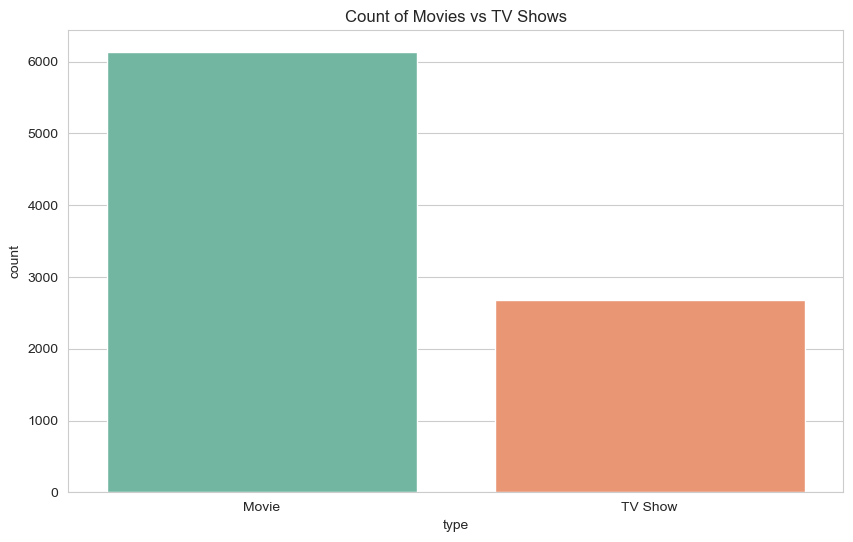

In [ ]:
# Count of Movies vs TV Shows
sns.countplot(data=df, x="type", hue="type", palette="Set2", legend=False)
plt.title("Count of Movies vs TV Shows")
plt.show()

### 📊 Observations & Insights
Observation: Netflix has significantly more Movies than TV Shows.
Insight: This shows that Netflix’s library is still dominated by films, though TV shows have been increasing in recent years.


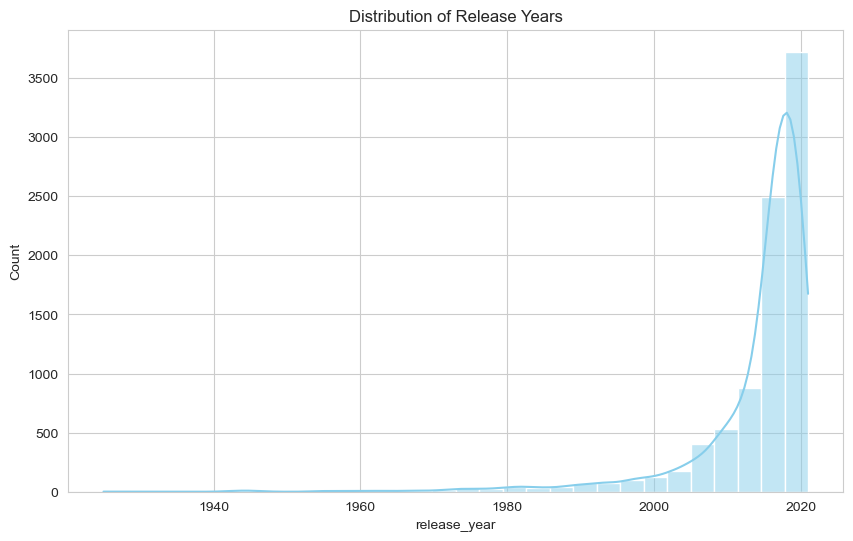

In [ ]:
# Distribution of Release Years
sns.histplot(data=df, x="release_year", bins=30, kde=True, color="skyblue")
plt.title("Distribution of Release Years")
plt.show()

### 📊 Observations & Insights
Observation: The number of releases on Netflix has increased sharply after 2015, peaking around 2018–2020.
Insight: This trend highlights Netflix’s expansion strategy, focusing heavily on adding new titles in the last decade.


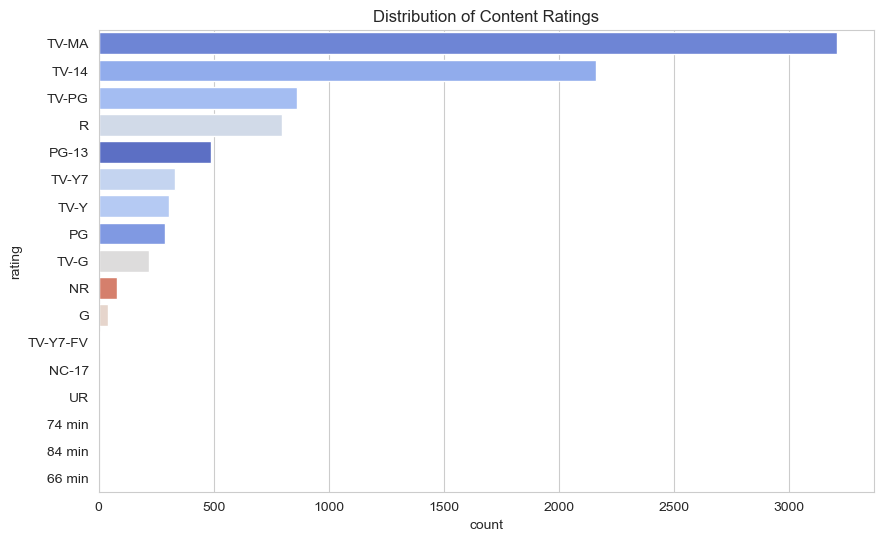

In [ ]:
# Ratings Distribution
sns.countplot(
    data=df,
    y="rating",
    hue="rating",   # add hue to align with palette
    order=df['rating'].value_counts().index,
    palette="coolwarm",
    legend=False    # hides redundant legend
)
plt.title("Distribution of Content Ratings")
plt.show()


### 📊 Observations & Insights
Observation: The most common ratings are TV-MA (Mature Audience) and TV-14, followed by R for movies.
Insight: Netflix primarily targets teenagers and adults, with relatively fewer titles for young children.


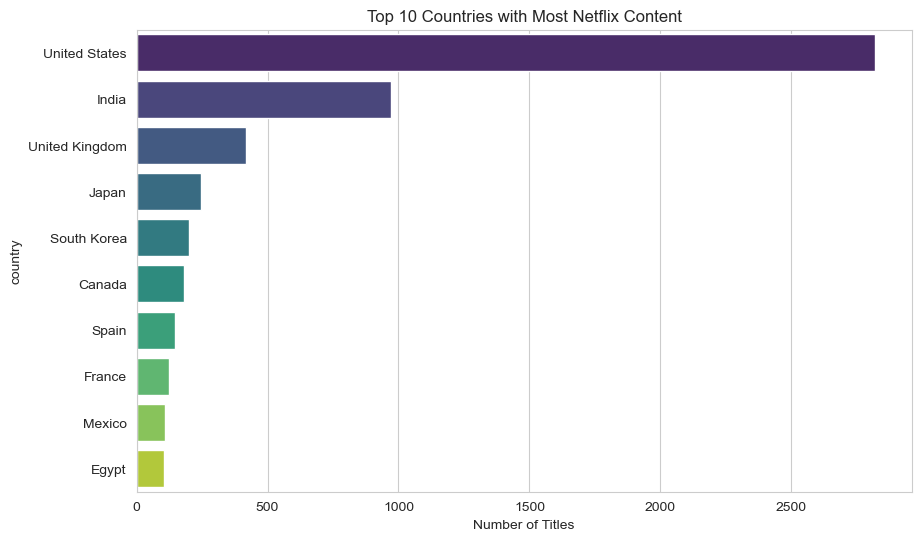

In [ ]:
# Top 10 Countries by Content
top_countries = df['country'].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,   
    palette="viridis",
    legend=False               
)

plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.show()


### 📊 Observations & Insights
Observation: The United States produces the most Netflix content, followed by India,United Kingdom, and other countries.
Insight: Netflix heavily invests in the US market, but also focuses on India and global markets for localized content.


## 📊 Bivariate Analysis (Comparisons)

Bivariate plots help us see **how two variables relate to each other**.  
We will use:

- Box/Violin Plots → Release year by type (Movie/TV Show)  
- Scatter Plot → Release year vs movie duration  
- Bar Plot → Average movie duration by rating  

These comparisons reveal deeper insights into how categories affect numerical values.

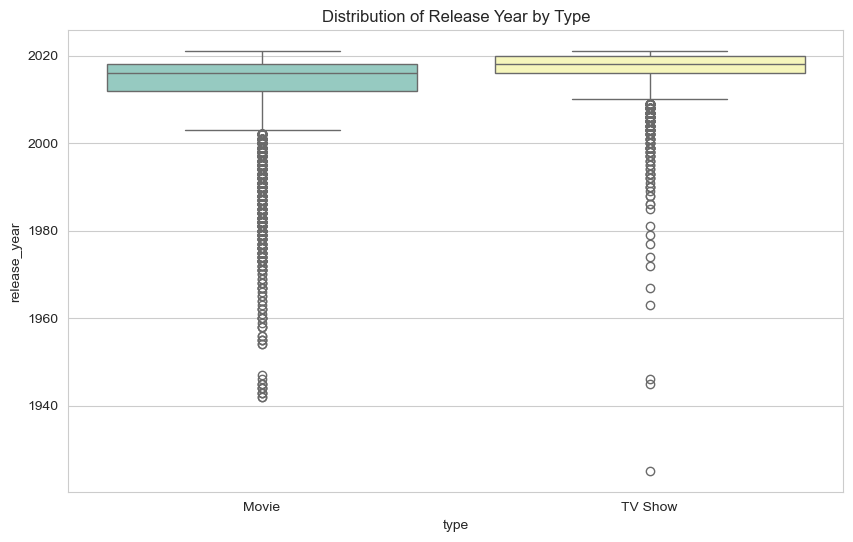

In [ ]:
# Release Year vs Type
sns.boxplot(
    data=df,
    x="type",
    y="release_year",
    hue="type",       
    palette="Set3",
    legend=False      
)
plt.title("Distribution of Release Year by Type")
plt.show()


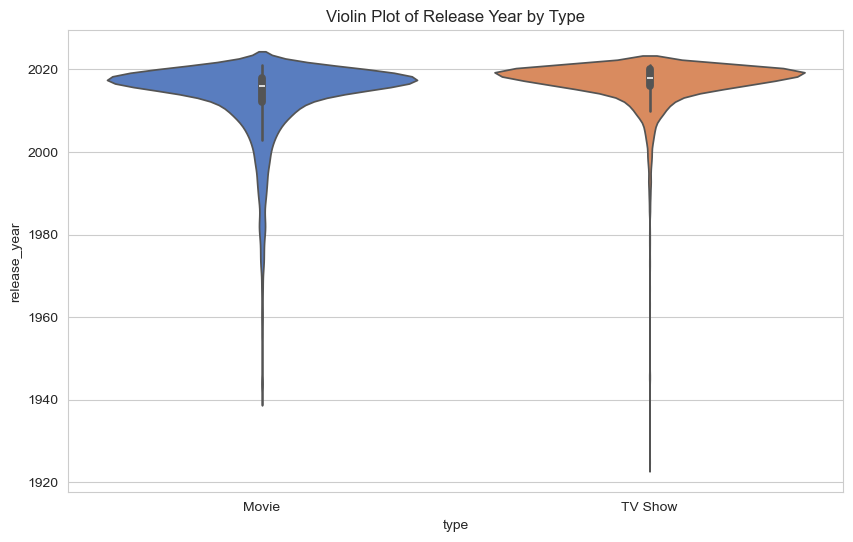

In [ ]:
# Violin Plot: Release Year by Type
sns.violinplot(
    data=df,
    x="type",
    y="release_year",
    hue="type",        
    palette="muted",
    legend=False       
)
plt.title("Violin Plot of Release Year by Type")
plt.show()


### 📊 Observations & Insights
Observation: Most Movies on Netflix are older (spread across many decades), while TV Shows are more recent, especially after 2010.
Insight: This suggests that Netflix acquires older movies but mostly invests in new TV series production.


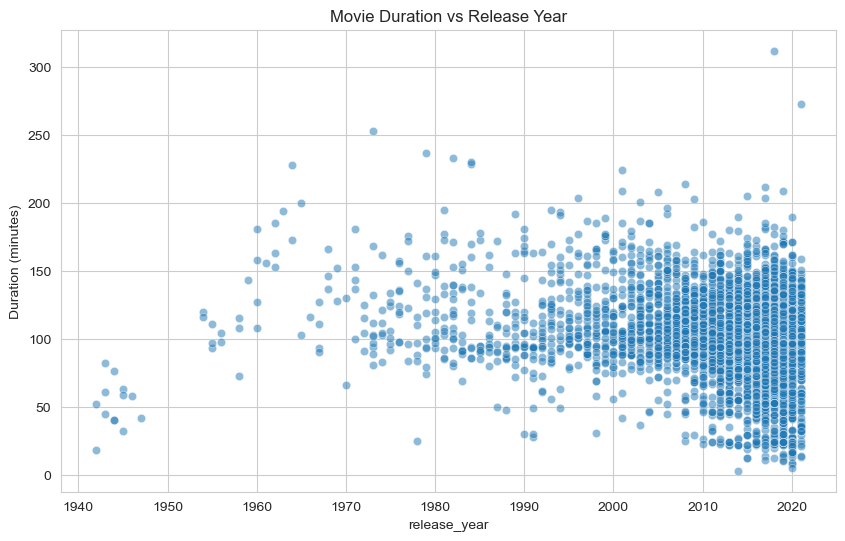

In [ ]:
# Scatter Plot: Release Year vs Duration (Movies only, numeric duration)
movies_df = df[df['type'] == "Movie"].copy()
movies_df['minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

sns.scatterplot(data=movies_df, x="release_year", y="minutes", alpha=0.5)
plt.title("Movie Duration vs Release Year")
plt.ylabel("Duration (minutes)")
plt.show()

### 📊 Observations & Insights 
Observation: Movie duration is mostly between 80–120 minutes, with no clear trend across years. Some outliers exist with very long runtimes.
Insight: Netflix tends to maintain the traditional movie length, rarely producing very short or very long films.


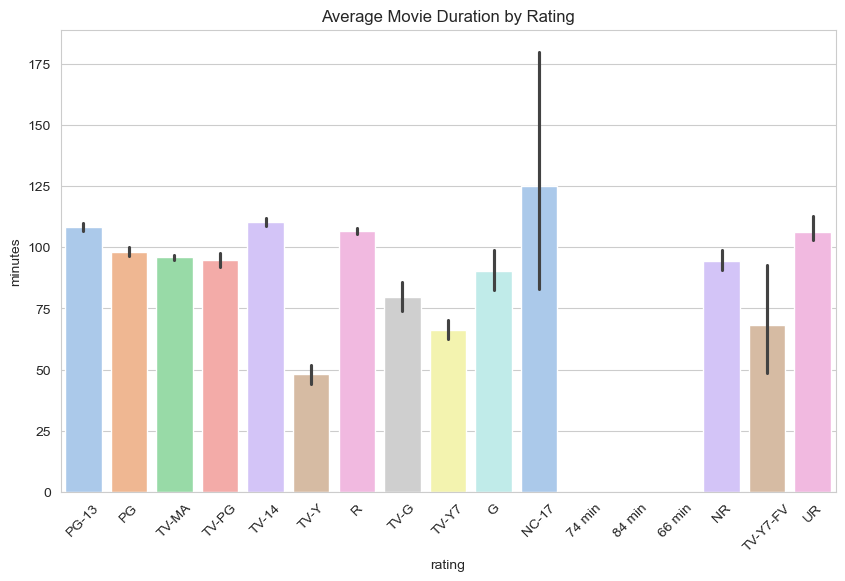

In [ ]:
# Bar Plot: Average Duration by Rating (Movies only)
sns.barplot(
    data=movies_df,
    x="rating",
    y="minutes",
    hue="rating",          
    estimator=np.mean,
    palette="pastel",
    legend=False           
)
plt.title("Average Movie Duration by Rating")
plt.xticks(rotation=45)
plt.show()


### 📊 Observations & Insights 
Observation: Movies rated PG-13 and R tend to have slightly longer average durations than G-rated or TV-PG movies.
Insight: Family/kids’ movies are usually shorter, while mature-rated films run longer.


## 📊 Multivariate and Advanced Analysis

Here, we examine **relationships among multiple variables** using advanced plots:

- Heatmap → Correlation between numerical variables  
- Pair Plot → Release year & duration distribution  
- Facet/Grouped Plots → Genre/Type relationships  

These visualizations highlight trends and patterns across more than two dimensions.

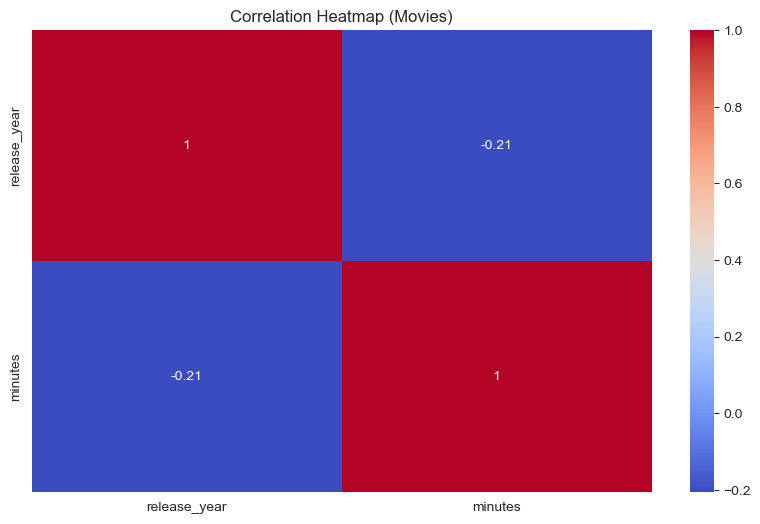

In [ ]:
# Heatmap: Correlation (only numerical fields)
num_corr = movies_df[['release_year', 'minutes']].corr()
sns.heatmap(num_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Movies)")
plt.show()

### 📊 Observations & Insights 
Observation: There is no strong correlation between release year and duration.
Insight: The length of movies does not depend on when they were released.


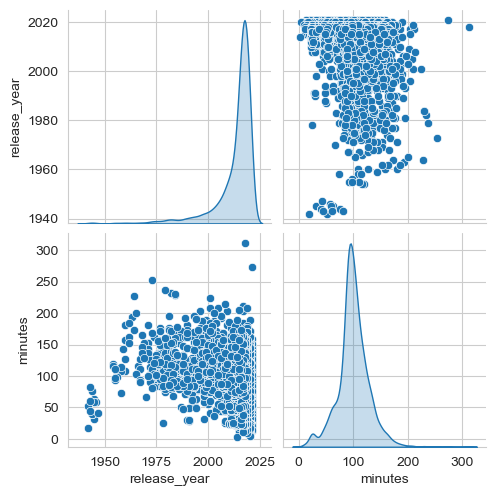

In [ ]:
# Pair Plot: Release Year & Duration
sns.pairplot(movies_df[['release_year', 'minutes']], diag_kind="kde")
plt.show()

### 📊 Observations & Insights 
Observation: Most data points cluster between 2000–2020 for release year and 80–120 minutes for duration.
Insight: The bulk of Netflix’s movie library is from the modern era with standard movie lengths.


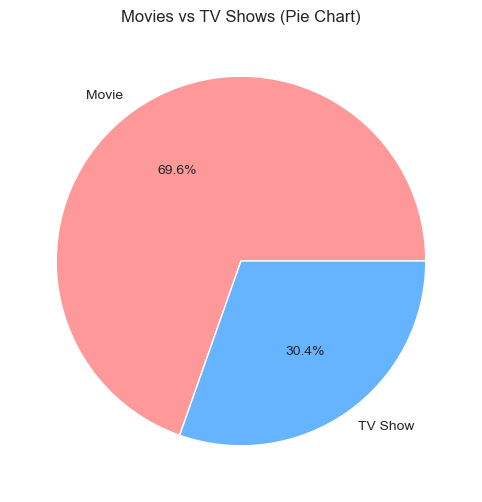

In [ ]:
# Pie Chart: Distribution of Content Type
df['type'].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Movies vs TV Shows (Pie Chart)")
plt.ylabel("")
plt.show()

### 📊 Observations & Insights 
Observation: About 70% are Movies, while 30% are TV Shows.
Insight: Movies still dominate Netflix’s catalog, but TV Shows form a significant and growing portion.
![Screenshot : Distribution of Content Type]("Screenshots\Pie_Chart_Distribution_of_Content_Type.png")

## 📌 Insights & Conclusion

After analyzing the Netflix dataset, we can draw the following key insights:

- **Movies dominate the catalog**: About 70% of titles are movies, while ~30% are TV shows.  
- **Content growth surged after 2015**, with a peak around 2018–2020 as Netflix invested heavily in originals.  
- **Ratings focus on teenagers and adults**: Most titles are rated **TV-MA** (Mature Audiences) or **TV-14** (Teens), showing Netflix’s audience targeting.  
- **The United States leads production**, followed by **India, the UK, and other countries**, highlighting Netflix’s global strategy.  
- **Movies mostly run between 80–120 minutes**, while TV shows are described by seasons.  
- **Older movies + newer TV shows**: Netflix tends to add older films to its library but emphasizes producing/releasing new TV shows.  

### ✅ Conclusion
Netflix’s strategy seems to focus on:  
1. Expanding its **TV show collection** in recent years.  
2. **Targeting young adult audiences** through content ratings.  
3. Maintaining a **global presence** by including content from many countries, while still being dominated by the US and India.  

This analysis provides a clear understanding of Netflix’s content trends, which could help in predicting **future expansion strategies**.

